# Figure 4 
## Distribution of IEAemph and IEAairway values grouped by previously published COPD K-means clustering subtypes.

In [1]:
import numpy as np
import sys
sys.path.append("../../src/")
import utility
import pandas as pd

from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

from scipy.stats import kruskal
from statsmodels.stats.proportion import proportions_chisquare

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib

import statsmodels.api as sm

from scipy import stats

import pandas as pd

import math
import seaborn as sns

# Loading data

In [2]:
df_IEA_train = pd.read_csv("../../output/IEA_train.csv").set_index("sid")
df_IEA_test = pd.read_csv("../../output/IEA_test.csv").set_index("sid")

df_data = utility.load_data()

df_used = pd.merge(df_data, df_IEA_test, left_index = True, right_index = True)[ ["IEA0", "IEA1", "KM_v2"]]

/ocean/projects/asc170022p/juc91/anaconda/envs/IEA/lib/python3.7/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
../../src/utility.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cov[df_cov == ""] = "nan"
/ocean/projects/asc170022p/juc91/anaconda/envs/IEA/lib/python3.7/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

# Generating the box plot

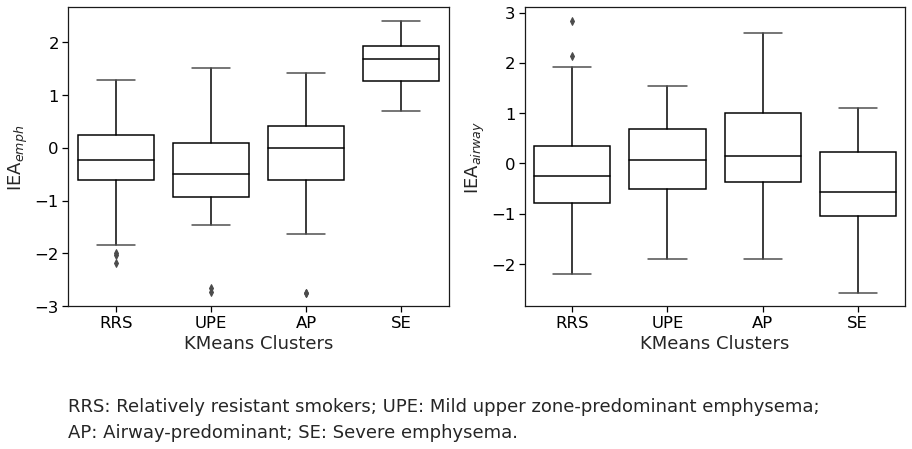

In [3]:
cluster_labels = ["RRS", "UPE", "AP", "SE"]

df_used = df_used.rename(columns = {"IEA0":"IEA$_{emph}$", "IEA1":"IEA$_{airway}$", "KM_v2":"KMeans Clusters"})

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
}

sns.set(font_scale = 1.5)
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})


plt.figure(figsize = [15, 5.5])
ax1 = plt.subplot(121)
ax1 = sns.boxplot(x="KMeans Clusters", y="IEA$_{emph}$", data=df_used, **PROPS)
ax1.set_xticklabels(["RRS", "UPE", "AP", "SE"])

ax1.grid(False)
ax1.set_facecolor((1, 1, 1))
ax1.spines['bottom'].set_color('k')
ax1.spines['top'].set_color('k') 
ax1.spines['right'].set_color('k')
ax1.spines['left'].set_color('k')


ax2 = plt.subplot(122)
ax2 = sns.boxplot(x="KMeans Clusters", y="IEA$_{airway}$", data=df_used,  **PROPS)
ax2.set_xticklabels(cluster_labels)

ax2.grid(False)
ax2.set_facecolor((1, 1, 1))
ax2.spines['bottom'].set_color('k')
ax2.spines['top'].set_color('k') 
ax2.spines['right'].set_color('k')
ax2.spines['left'].set_color('k')


_ = ax1.text(-.5, -5, "RRS: Relatively resistant smokers; UPE: Mild upper zone-predominant emphysema;", 
          fontsize = 18)
_ = ax1.text(-.5, -5.5, "AP: Airway-predominant; SE: Severe emphysema.",
          fontsize = 18)



# p-values with IEA$_{emph}$

In [4]:
for iii in range(1, 5):
    for jjj in range(1, iii ):
        
        p_values = kruskal( 
                df_used.loc[df_used["KMeans Clusters"] == iii, "IEA$_{emph}$"], 
                 df_used.loc[df_used["KMeans Clusters"] == jjj, "IEA$_{emph}$"]
               ).pvalue
        
        print( "{} vs {} p-value:{:.3f}".format(cluster_labels[iii - 1], cluster_labels[jjj - 1], p_values)
        )
        


UPE vs RRS p-value:0.103
AP vs RRS p-value:0.334
AP vs UPE p-value:0.039
SE vs RRS p-value:0.000
SE vs UPE p-value:0.000
SE vs AP p-value:0.000


# p-values with IEA$_{airway}$

In [5]:
for iii in range(1, 5):
    for jjj in range(1, iii ):
        
        p_values = kruskal( 
                df_used.loc[df_used["KMeans Clusters"] == iii, "IEA$_{airway}$"], 
                 df_used.loc[df_used["KMeans Clusters"] == jjj, "IEA$_{airway}$"]
               ).pvalue
        
        print( "{} vs {} p-value:{:.3f}".format(cluster_labels[iii - 1], cluster_labels[jjj - 1], p_values)
        )
        


UPE vs RRS p-value:0.065
AP vs RRS p-value:0.002
AP vs UPE p-value:0.348
SE vs RRS p-value:0.252
SE vs UPE p-value:0.020
SE vs AP p-value:0.002
